In [34]:
%pylab inline
import skimage
import numpy as np
from pathlib import Path
import skimage.io

import glob
from skimage.filters import sobel, threshold_niblack, gaussian, threshold_otsu, threshold_li, threshold_mean, threshold_sauvola
from skimage.morphology import label
import pandas as pd
import seaborn as sns
# import sed3

Populating the interactive namespace from numpy and matplotlib


In [35]:
pth_roots = Path(r"g:/Můj disk/data/biology/orig/roots/")
fns = glob.glob(str(pth_roots/ "**/*.tif"))
fns

['g:\\Můj disk\\data\\biology\\orig\\roots\\examples\\R2D2-20x-1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\examples\\DIIVenus-20x-2.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\examples\\R2D2-40x-1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\examples\\DIIVenus-20x-1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\1channel\\20200311-DII-25las-GR1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\1channel\\20200226-DII-30las-2GR1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\1channel\\20200226-DII-30las-2PRE1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\1channel\\20200311-DII-25las-PRE1.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\2channel\\20200305-r2d2-PRE3.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\2channel\\20200305-r2d2-GR3.tif',
 'g:\\Můj disk\\data\\biology\\orig\\roots\\2channel\\ControlAll-tiny.tif']

In [36]:
fn = fns[0]

In [46]:
def get_image(fn):
    imgbig = skimage.io.imread(fn)
    taxis = 0
    caxis = 1
    xaxis = -1
    yaxis = -2
    cvalue = imgbig.shape[caxis] - 1
    sl = [0] * imgbig.ndim
    sl[int(caxis)] = int(cvalue)
    sl[int(xaxis)] = slice(None)
    sl[int(yaxis)] = slice(None)
    sl[int(taxis)] = slice(None)

    img = imgbig[sl]
    return img
# print(img.shape)
# threshold_otsu()

In [52]:
def threshold_niblack_k0(im):
    
#     window = (int(imh * window_size), int(imw * window_size))
    window = (np.asarray(im.shape)/8).astype(int)
    if window[0] % 2 == 0:
        window = (window[0] + 1, window[1])
    if window[1] % 2 == 0:
        window = (window[0], window[1] + 1)
    
    return threshold_niblack(im, k=0, window_size = window)

thr_fcns = [
    threshold_niblack_k0,
    threshold_otsu,
#     threshold_li, 
#     threshold_mean, 
    threshold_sauvola
]

In [39]:
# Path(fn).stem + "_thr" 

In [53]:
dfd = {
    "labels": [],
    "threshold": [],
    "threshold std": [],
    "fn": [],
    "threshold function": [],
    "frame_id": []
}

for fn in fns[4:]:
    img = get_image(fn)
    print(img.dtype)

    for threshold_fcn in thr_fcns:
    # threshold_fcn = thr_fcns[1]

        iml = np.zeros_like(img, dtype = np.uint8)
        for i in range(5):
#         for i in range(img.shape[0]):
            threshold = threshold_fcn(img[i,:,:])
            imthr_frame = img[i,:,:] > threshold
            iml_frame = skimage.morphology.label(imthr_frame)

            iml[i,:,:] = imthr_frame
            dfd["threshold"].append(np.mean(threshold))
            dfd["threshold std"].append(np.std(threshold))
            nlabs = np.max(iml_frame)
            dfd["labels"].append(nlabs)
            fnname = Path(fn).name
            dfd["fn"].append(fnname)
            dfd["threshold function"].append(threshold_fcn.__name__)
            dfd["frame_id"].append(i)

            print(f"thr={threshold_fcn.__name__}, fn={fnname}, i={i}, nlabs={nlabs}")
        try:
            skimage.io.imsave(threshold_fcn.__name__ +"_"+ Path(fn).name, iml*128)
        except Exception as e:
            print(e)
            pass

    
    

    

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


uint16
thr=threshold_niblack_k0, fn=20200311-DII-25las-GR1.tif, i=0, nlabs=10020
thr=threshold_niblack_k0, fn=20200311-DII-25las-GR1.tif, i=1, nlabs=9929
thr=threshold_niblack_k0, fn=20200311-DII-25las-GR1.tif, i=2, nlabs=9968
thr=threshold_niblack_k0, fn=20200311-DII-25las-GR1.tif, i=3, nlabs=9961
thr=threshold_niblack_k0, fn=20200311-DII-25las-GR1.tif, i=4, nlabs=9879
thr=threshold_otsu, fn=20200311-DII-25las-GR1.tif, i=0, nlabs=14763
thr=threshold_otsu, fn=20200311-DII-25las-GR1.tif, i=1, nlabs=11462
thr=threshold_otsu, fn=20200311-DII-25las-GR1.tif, i=2, nlabs=15910
thr=threshold_otsu, fn=20200311-DII-25las-GR1.tif, i=3, nlabs=15786
thr=threshold_otsu, fn=20200311-DII-25las-GR1.tif, i=4, nlabs=15888
thr=threshold_sauvola, fn=20200311-DII-25las-GR1.tif, i=0, nlabs=1
thr=threshold_sauvola, fn=20200311-DII-25las-GR1.tif, i=1, nlabs=3
thr=threshold_sauvola, fn=20200311-DII-25las-GR1.tif, i=2, nlabs=2
thr=threshold_sauvola, fn=20200311-DII-25las-GR1.tif, i=3, nlabs=2
thr=threshold_sauvo

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:36: UserWarning: threshold_otsu_20200226-DII-30las-2GR1.tif is a low contrast image


thr=threshold_sauvola, fn=20200226-DII-30las-2GR1.tif, i=0, nlabs=8
thr=threshold_sauvola, fn=20200226-DII-30las-2GR1.tif, i=1, nlabs=2
thr=threshold_sauvola, fn=20200226-DII-30las-2GR1.tif, i=2, nlabs=5
thr=threshold_sauvola, fn=20200226-DII-30las-2GR1.tif, i=3, nlabs=4
thr=threshold_sauvola, fn=20200226-DII-30las-2GR1.tif, i=4, nlabs=5
uint16
thr=threshold_niblack_k0, fn=20200226-DII-30las-2PRE1.tif, i=0, nlabs=15894
thr=threshold_niblack_k0, fn=20200226-DII-30las-2PRE1.tif, i=1, nlabs=16003
thr=threshold_niblack_k0, fn=20200226-DII-30las-2PRE1.tif, i=2, nlabs=16934
thr=threshold_niblack_k0, fn=20200226-DII-30las-2PRE1.tif, i=3, nlabs=16789
thr=threshold_niblack_k0, fn=20200226-DII-30las-2PRE1.tif, i=4, nlabs=16922
thr=threshold_otsu, fn=20200226-DII-30las-2PRE1.tif, i=0, nlabs=290
thr=threshold_otsu, fn=20200226-DII-30las-2PRE1.tif, i=1, nlabs=330
thr=threshold_otsu, fn=20200226-DII-30las-2PRE1.tif, i=2, nlabs=291
thr=threshold_otsu, fn=20200226-DII-30las-2PRE1.tif, i=3, nlabs=309
t

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:36: UserWarning: threshold_otsu_20200226-DII-30las-2PRE1.tif is a low contrast image


thr=threshold_sauvola, fn=20200226-DII-30las-2PRE1.tif, i=0, nlabs=4
thr=threshold_sauvola, fn=20200226-DII-30las-2PRE1.tif, i=1, nlabs=6
thr=threshold_sauvola, fn=20200226-DII-30las-2PRE1.tif, i=2, nlabs=4
thr=threshold_sauvola, fn=20200226-DII-30las-2PRE1.tif, i=3, nlabs=4
thr=threshold_sauvola, fn=20200226-DII-30las-2PRE1.tif, i=4, nlabs=4
uint16
thr=threshold_niblack_k0, fn=20200311-DII-25las-PRE1.tif, i=0, nlabs=11344
thr=threshold_niblack_k0, fn=20200311-DII-25las-PRE1.tif, i=1, nlabs=11229
thr=threshold_niblack_k0, fn=20200311-DII-25las-PRE1.tif, i=2, nlabs=11128
thr=threshold_niblack_k0, fn=20200311-DII-25las-PRE1.tif, i=3, nlabs=11215
thr=threshold_niblack_k0, fn=20200311-DII-25las-PRE1.tif, i=4, nlabs=11248
thr=threshold_otsu, fn=20200311-DII-25las-PRE1.tif, i=0, nlabs=9403
thr=threshold_otsu, fn=20200311-DII-25las-PRE1.tif, i=1, nlabs=9620
thr=threshold_otsu, fn=20200311-DII-25las-PRE1.tif, i=2, nlabs=9282
thr=threshold_otsu, fn=20200311-DII-25las-PRE1.tif, i=3, nlabs=9369
t

C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:36: UserWarning: threshold_sauvola_20200305-r2d2-PRE3.tif is a low contrast image


float32
thr=threshold_niblack_k0, fn=20200305-r2d2-GR3.tif, i=0, nlabs=18093
thr=threshold_niblack_k0, fn=20200305-r2d2-GR3.tif, i=1, nlabs=17698
thr=threshold_niblack_k0, fn=20200305-r2d2-GR3.tif, i=2, nlabs=17496
thr=threshold_niblack_k0, fn=20200305-r2d2-GR3.tif, i=3, nlabs=17716
thr=threshold_niblack_k0, fn=20200305-r2d2-GR3.tif, i=4, nlabs=17168
thr=threshold_otsu, fn=20200305-r2d2-GR3.tif, i=0, nlabs=124
thr=threshold_otsu, fn=20200305-r2d2-GR3.tif, i=1, nlabs=128
thr=threshold_otsu, fn=20200305-r2d2-GR3.tif, i=2, nlabs=119
thr=threshold_otsu, fn=20200305-r2d2-GR3.tif, i=3, nlabs=115
thr=threshold_otsu, fn=20200305-r2d2-GR3.tif, i=4, nlabs=119
thr=threshold_sauvola, fn=20200305-r2d2-GR3.tif, i=0, nlabs=0
thr=threshold_sauvola, fn=20200305-r2d2-GR3.tif, i=1, nlabs=0
thr=threshold_sauvola, fn=20200305-r2d2-GR3.tif, i=2, nlabs=0
thr=threshold_sauvola, fn=20200305-r2d2-GR3.tif, i=3, nlabs=0
thr=threshold_sauvola, fn=20200305-r2d2-GR3.tif, i=4, nlabs=0


C:\Users\Jirik\Miniconda3\envs\scaffan\lib\site-packages\ipykernel_launcher.py:36: UserWarning: threshold_sauvola_20200305-r2d2-GR3.tif is a low contrast image


[Errno 28] No space left on device
uint8
thr=threshold_niblack_k0, fn=ControlAll-tiny.tif, i=0, nlabs=27037
thr=threshold_niblack_k0, fn=ControlAll-tiny.tif, i=1, nlabs=25353
thr=threshold_niblack_k0, fn=ControlAll-tiny.tif, i=2, nlabs=24583
thr=threshold_niblack_k0, fn=ControlAll-tiny.tif, i=3, nlabs=23148
thr=threshold_niblack_k0, fn=ControlAll-tiny.tif, i=4, nlabs=21836
[Errno 28] No space left on device
thr=threshold_otsu, fn=ControlAll-tiny.tif, i=0, nlabs=190
thr=threshold_otsu, fn=ControlAll-tiny.tif, i=1, nlabs=200
thr=threshold_otsu, fn=ControlAll-tiny.tif, i=2, nlabs=205
thr=threshold_otsu, fn=ControlAll-tiny.tif, i=3, nlabs=209
thr=threshold_otsu, fn=ControlAll-tiny.tif, i=4, nlabs=215
[Errno 28] No space left on device
thr=threshold_sauvola, fn=ControlAll-tiny.tif, i=0, nlabs=649
thr=threshold_sauvola, fn=ControlAll-tiny.tif, i=1, nlabs=757
thr=threshold_sauvola, fn=ControlAll-tiny.tif, i=2, nlabs=763
thr=threshold_sauvola, fn=ControlAll-tiny.tif, i=3, nlabs=770
thr=thresho

In [63]:
fn0 = threshold_fcn.__name__ +"_nuova_"+ Path(fn).name
print(iml.dtype)
print(fn0)
skimage.io.imsave(fn0, iml[:4,:,:]*128, plugin='tifffile')

uint8
threshold_sauvola_nuova_ControlAll-tiny.tif


In [62]:
skimage.io.plugin_order()

{'imread': ['imageio', 'matplotlib', 'tifffile'],
 'imsave': ['imageio', 'tifffile'],
 'imshow': ['matplotlib'],
 'imread_collection': ['imageio', 'matplotlib', 'tifffile'],
 'imshow_collection': ['matplotlib'],
 '_app_show': ['matplotlib']}

In [42]:
%pwd

'C:\\Users\\Jirik\\projects\\celltrack\\devel'

In [43]:
df = pd.DataFrame(dfd)
df.to_excel("thr.xlsx")

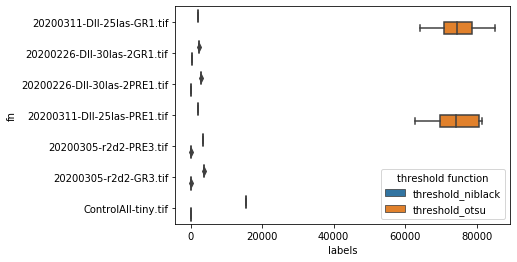

In [44]:
sns.boxplot(data=df, hue="threshold function", x="labels", y="fn")